In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Bhoomika\Downloads\Weather data\seattle-weather.csv")

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [4]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,27-12-2015,8.6,4.4,1.7,2.9,rain
1457,28-12-2015,1.5,5.0,1.7,1.3,rain
1458,29-12-2015,0.0,7.2,0.6,2.6,fog
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun
1460,31-12-2015,0.0,5.6,-2.1,3.5,sun


In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [8]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
df.value_counts()

date        precipitation  temp_max  temp_min  wind  weather
01-01-2012  0.0            12.8       5.0      4.7   drizzle    1
21-06-2014  0.0            22.2       10.6     3.6   sun        1
21-06-2012  0.0            23.9       11.7     2.1   sun        1
21-05-2015  0.0            25.6       11.7     2.1   sun        1
21-05-2014  0.0            20.0       10.6     1.7   sun        1
                                                               ..
11-02-2013  0.3            8.3        4.4      1.4   rain       1
11-02-2012  0.8            8.9        5.6      3.4   rain       1
11-01-2015  1.5            9.4        7.2      1.1   rain       1
11-01-2014  21.3           14.4       7.2      8.8   rain       1
31-12-2015  0.0            5.6       -2.1      3.5   sun        1
Name: count, Length: 1461, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [11]:
df.dropna(how= 'any', inplace=True)
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [12]:
# Converting flot to intiger
df['precipitation'] = df['precipitation'].astype(int)
df['temp_max'] = df['temp_max'].astype(int)
df['temp_min'] = df['temp_min'].astype(int)
df['wind'] = df['wind'].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1461 non-null   object
 1   precipitation  1461 non-null   int32 
 2   temp_max       1461 non-null   int32 
 3   temp_min       1461 non-null   int32 
 4   wind           1461 non-null   int32 
 5   weather        1461 non-null   object
dtypes: int32(4), object(2)
memory usage: 45.8+ KB


In [14]:
df.drop(["date"], axis=1, inplace=True)

In [15]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0,12,5,4,drizzle
1,10,10,2,4,rain
2,0,11,7,2,rain
3,20,12,5,4,rain
4,1,8,2,6,rain
...,...,...,...,...,...
1456,8,4,1,2,rain
1457,1,5,1,1,rain
1458,0,7,0,2,fog
1459,0,5,-1,3,sun


In [16]:
df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [17]:
df.replace({"weather" : {"drizzle" : 0, "rain" : 1, "sun": 2, "snow": 3, "fog": 4}}, inplace = True)

In [18]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0,12,5,4,0
1,10,10,2,4,1
2,0,11,7,2,1
3,20,12,5,4,1
4,1,8,2,6,1


In [19]:
df.dtypes

precipitation    int32
temp_max         int32
temp_min         int32
wind             int32
weather          int64
dtype: object

In [20]:
x = df.drop(["weather"], axis =1)
y = df["weather"]

In [21]:
print(x)

      precipitation  temp_max  temp_min  wind
0                 0        12         5     4
1                10        10         2     4
2                 0        11         7     2
3                20        12         5     4
4                 1         8         2     6
...             ...       ...       ...   ...
1456              8         4         1     2
1457              1         5         1     1
1458              0         7         0     2
1459              0         5        -1     3
1460              0         5        -2     3

[1461 rows x 4 columns]


In [22]:
print(y)

0       0
1       1
2       1
3       1
4       1
       ..
1456    1
1457    1
1458    4
1459    2
1460    2
Name: weather, Length: 1461, dtype: int64


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [24]:
lin_reg_model = LogisticRegression()

In [25]:
lin_reg_model.fit(x_train, y_train)

C:\Users\Bhoomika\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
tranning_data_pred = lin_reg_model.predict(x_train)

In [27]:
lin_reg_model.score(x_train, y_train)*100

76.79794520547945

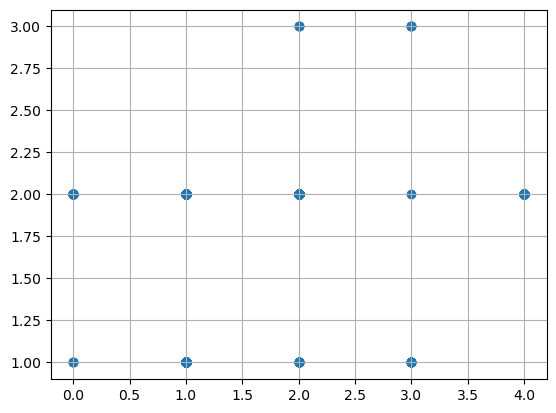

In [28]:
plt.scatter(y_train, tranning_data_pred)
plt.grid()
plt.show()

In [29]:
lin_reg_model.predict([[10,10,2,4]])

C:\Users\Bhoomika\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [30]:
lin_reg_model.predict([[0,12,5,4]])

C:\Users\Bhoomika\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [31]:
lin_reg_model.predict([[20, 12, 5,4]])

C:\Users\Bhoomika\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [32]:
test_data_pred = lin_reg_model.predict(x_test)

In [33]:
lin_reg_model.score(x_test, y_test)*100

76.10921501706484

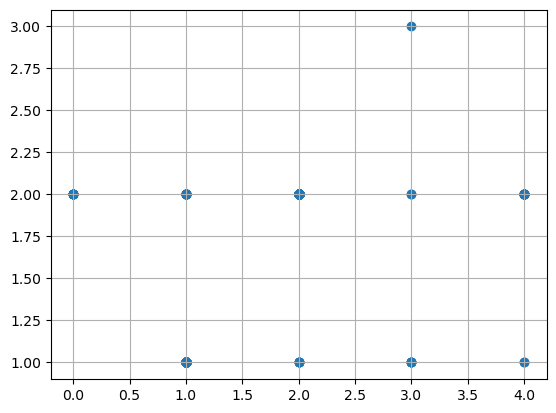

In [34]:
plt.scatter(y_test, test_data_pred)
plt.grid()
plt.show()

In [35]:
import pickle

saved_model = pickle.dumps(lin_reg_model)
weather_from_pickle = pickle.loads(saved_model)
weather_from_pickle.predict(x_test)

array([2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2], dtype=int64)

In [36]:
pickle.dump(lin_reg_model, open("weather.pkl", 'wb'))

In [37]:
model = pickle.load(open("weather.pkl", "rb"))

In [38]:
x_train

,precipitation,temp_max,temp_min,wind
1066,0,5,-3,5
638,18,13,10,6
799,18,12,6,2
380,0,6,0,2
303,34,15,12,2
...,...,...,...,...
1130,8,10,4,1
1294,0,33,17,3
860,0,15,7,2
1459,0,5,-1,3


In [39]:
y_train

1066    4
638     1
799     1
380     2
303     1
       ..
1130    1
1294    2
860     1
1459    2
1126    4
Name: weather, Length: 1168, dtype: int64

In [40]:
x.head(40)

,precipitation,temp_max,temp_min,wind
0,0,12,5,4
1,10,10,2,4
2,0,11,7,2
3,20,12,5,4
4,1,8,2,6
5,2,4,2,2
6,0,7,2,2
7,0,10,2,2
8,4,9,5,3
9,1,6,0,3


In [41]:
y.head(40)

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     1
9     1
10    2
11    2
12    2
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    1
21    1
22    1
23    1
24    1
25    1
26    0
27    1
28    1
29    1
30    1
31    1
32    2
33    2
34    2
35    2
36    2
37    1
38    1
39    1
Name: weather, dtype: int64

In [42]:
print(model.predict([[27,9, 3, 4]]))

[1]


C:\Users\Bhoomika\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
